# Milestone 1: Data Preparation for Machine Learning
## Bank Transaction Fraud Detection

This notebook implements comprehensive data cleaning, transformation, and pipeline creation for fraud detection.

---
## SECTION 1: Data Loading and Initial Exploration

### 1.1 Load Dataset

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Load the dataset
df = pd.read_csv("heart.csv")
target_column = 'HeartDisease'

print('--- Dataset Overview ---')
print(f'Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}')
print(f'\nFirst 5 rows:')
df.head(5)

--- Dataset Overview ---
Number of rows: 918, Number of columns: 12

First 5 rows:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### 1.2 Column Information

In [5]:
print('--- Column Information ---')
df.info()

--- Column Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### 1.3 Statistical Summary

In [6]:
print('--- Statistical Summary ---')
df.describe()

--- Statistical Summary ---


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### 1.4 Missing Values Check

In [7]:
print('--- Missing Values Check ---')
print('Null values in each column:')
print(df.isnull().sum())
print(f'\nTotal missing values: {df.isnull().sum().sum()}')

--- Missing Values Check ---
Null values in each column:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Total missing values: 0


### 1.5 Duplicate Check

In [8]:
print('--- Duplicate Check ---')
print(f'Number of duplicate rows: {df.duplicated().sum()}')

--- Duplicate Check ---
Number of duplicate rows: 0


---
## SECTION 2: Data Visualization and Outlier Detection

### 2.1 Identify Feature Types

In [10]:
# Identify numerical and categorical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f'Numerical columns ({len(num_cols)}): {num_cols}')
print(f'Categorical columns ({len(cat_cols)}): {cat_cols}')

Numerical columns (7): ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
Categorical columns (5): ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


### 2.2 Kurtosis Analysis
Kurtosis measures the "tailedness" of the distribution. Values > 3 indicate leptokurtic distributions with heavy tails (more outliers).

In [11]:
print('--- Kurtosis Analysis ---')
for col in num_cols:
    kurtosis = df[col].kurtosis()
    print(f"{col:30s} → Kurtosis: {kurtosis:7.2f}")
    if kurtosis > 3:
        print(f"  → {col} has a leptokurtic distribution, we have more noise and outliers.")

--- Kurtosis Analysis ---
Age                            → Kurtosis:   -0.39
RestingBP                      → Kurtosis:    3.27
  → RestingBP has a leptokurtic distribution, we have more noise and outliers.
Cholesterol                    → Kurtosis:    0.12
FastingBS                      → Kurtosis:   -0.40
MaxHR                          → Kurtosis:   -0.45
Oldpeak                        → Kurtosis:    1.20
HeartDisease                   → Kurtosis:   -1.96


### 2.3 Boxplot Visualization

--- Creating boxplots for outlier detection ---


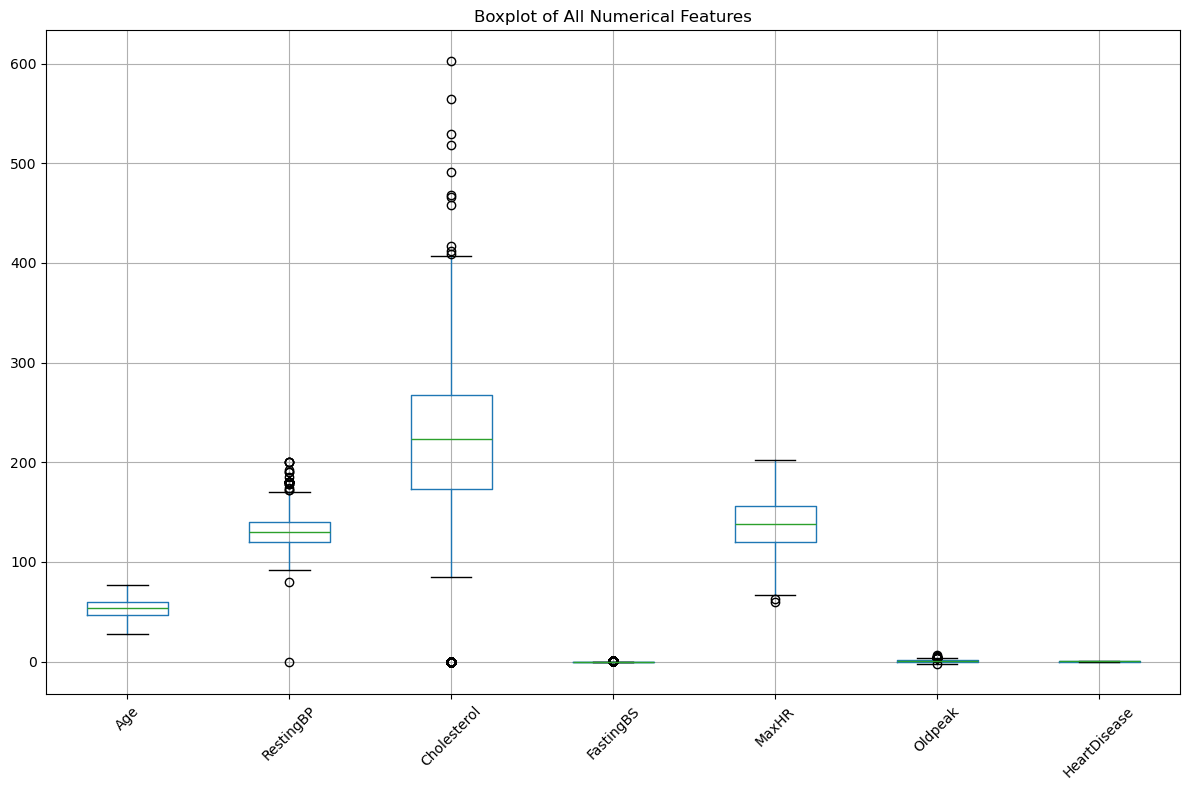

In [12]:
# Boxplots for numerical features (for outlier detection)
print('--- Creating boxplots for outlier detection ---')
df[num_cols].boxplot(figsize=(12, 8))
plt.title('Boxplot of All Numerical Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2.4 Correlation Analysis

In [13]:
print('--- Correlation Analysis ---')
corr_matrix = df[num_cols].corr()
print('Correlation matrix:')
print(corr_matrix)

--- Correlation Analysis ---
Correlation matrix:
                   Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000  


### 2.5 Correlation Heatmap

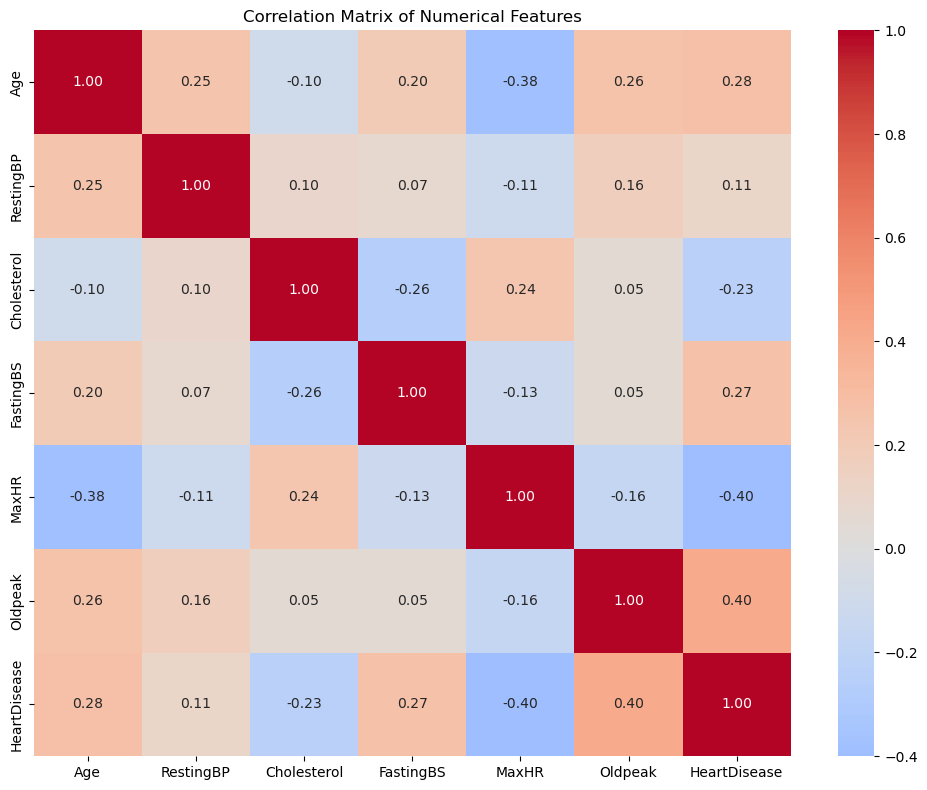

In [14]:
# Correlation heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

---
## SECTION 3: Data Cleaning

### 3.1 Handling Duplicates

In [15]:
df_copy = df.copy()

print('--- 3.1: Handling Duplicates ---')
duplicates_before = df_copy.duplicated().sum()
df_copy.drop_duplicates(inplace=True)
print(f'Duplicates removed: {duplicates_before}')
print(f'Rows remaining: {df_copy.shape[0]}')

--- 3.1: Handling Duplicates ---
Duplicates removed: 0
Rows remaining: 918


### 3.2 Cleaning Column Names

In [16]:
print('--- 3.2: Cleaning Column Names ---')
df_copy.columns = [col.strip().replace(' ', '_') for col in df_copy.columns]
print(f'Cleaned column names: {df_copy.columns.tolist()}')

--- 3.2: Cleaning Column Names ---
Cleaned column names: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']


### 3.3 Missing Values Strategy

In [17]:
print('--- 3.3: Missing Values Strategy ---')
missing_summary = df_copy.isnull().sum()
print('Missing values per column:')
print(missing_summary[missing_summary > 0])

--- 3.3: Missing Values Strategy ---
Missing values per column:
Series([], dtype: int64)


### 3.4 Drop Columns with >80% Missing Values

In [18]:
print('--- Dropping columns with >80% missing values ---')
missing_percentage = (df_copy.isnull().sum() / len(df_copy)) * 100
cols_to_drop = missing_percentage[missing_percentage > 80].index.tolist()

if cols_to_drop:
    print(f'Columns to drop (>80% missing): {cols_to_drop}')
    for col in cols_to_drop:
        print(f'  - {col}: {missing_percentage[col]:.2f}% missing')
    df_copy.drop(columns=cols_to_drop, inplace=True)
    print(f'Dropped {len(cols_to_drop)} column(s)')
    print(f'Remaining columns: {df_copy.shape[1]}')
else:
    print('No columns with >80% missing values found')

print('\nStrategy for remaining missing values:')
print('  - Numerical: median imputation (via pipeline)')
print('  - Categorical: most frequent imputation (via pipeline)')

--- Dropping columns with >80% missing values ---
No columns with >80% missing values found

Strategy for remaining missing values:
  - Numerical: median imputation (via pipeline)
  - Categorical: most frequent imputation (via pipeline)


### 3.5 Outlier Detection (IQR Method)

In [ ]:
print('--- 3.4: Outlier Detection ---')
for col in df_copy.select_dtypes(include=np.number).columns:
    Q1 = df_copy[col].quantile(0.25)
    Q3 = df_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_copy[(df_copy[col] < lower_bound) | (df_copy[col] > upper_bound)][col]
    print(f'{col:30s}: {len(outliers):5d} outliers detected')

print('\nNote: StandardScaler will reduce the impact of outliers.')

--- 3.4: Outlier Detection ---
Age                           :     0 outliers detected (kept for now)
RestingBP                     :    28 outliers detected (kept for now)
Cholesterol                   :   183 outliers detected (kept for now)
FastingBS                     :   214 outliers detected (kept for now)
MaxHR                         :     2 outliers detected (kept for now)
Oldpeak                       :    16 outliers detected (kept for now)
HeartDisease                  :     0 outliers detected (kept for now)

Note: StandardScaler will reduce the impact of outliers.


---
## SECTION 4: Train-Test Split

### 4.1 Separating Features and Target

In [20]:
print(f'--- 4.1: Separating Features and Target ---')
print(f'Target column: {target_column}')

X = df_copy.drop(target_column, axis=1)
y = df_copy[target_column]

print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

--- 4.1: Separating Features and Target ---
Target column: HeartDisease
Features shape: (918, 11)
Target shape: (918,)


### 4.2 Class Imbalance Analysis

In [21]:
class_counts = y.value_counts()
print(f'Target distribution:\n{class_counts}')

if len(class_counts) == 2:
    majority_class = class_counts.max()
    minority_class = class_counts.min()
    imbalance_ratio = majority_class / minority_class
    print(f'\nClass imbalance ratio: {imbalance_ratio:.2f}:1')
    if imbalance_ratio > 3:
        print(f'⚠️  Warning: Significant class imbalance detected!')
        print(f'   Consider using stratified split or resampling techniques.')

Target distribution:
HeartDisease
1    508
0    410
Name: count, dtype: int64

Class imbalance ratio: 1.24:1


### 4.3 Creating Train-Test Split (80/20)

In [22]:
print('--- 4.3: Creating Train-Test Split (80/20) ---')
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

print(f'Training set size: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)')
print(f'Test set size: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)')
print(f'\nTraining target distribution:\n{y_train.value_counts()}')
print(f'\nTest target distribution:\n{y_test.value_counts()}')

--- 4.3: Creating Train-Test Split (80/20) ---
Training set size: 734 (80.0%)
Test set size: 184 (20.0%)

Training target distribution:
HeartDisease
1    401
0    333
Name: count, dtype: int64

Test target distribution:
HeartDisease
1    107
0     77
Name: count, dtype: int64


---
## SECTION 5: Feature Type Isolation

### 5.1 Identifying Feature Types
This is going to be used in the collum transformation pipeline

In [23]:
print('--- 5.1: Identifying Feature Types ---')
numerical_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

print(f'Numerical features ({len(numerical_features)}): {numerical_features}')
print(f'Categorical features ({len(categorical_features)}): {categorical_features}')

--- 5.1: Identifying Feature Types ---
Numerical features (6): ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
Categorical features (5): ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


### 5.2 Create Feature Type DataFrames

In [24]:
x_train_num = X_train[numerical_features]
x_train_cat = X_train[categorical_features]

print(f'--- 5.2: Feature Type DataFrames ---')
print(f'x_train_num shape: {x_train_num.shape}')
print(f'x_train_cat shape: {x_train_cat.shape}')
print(f'\nMissing values in numerical features:\n{x_train_num.isnull().sum()}')
print(f'\nMissing values in categorical features:\n{x_train_cat.isnull().sum()}')

--- 5.2: Feature Type DataFrames ---
x_train_num shape: (734, 6)
x_train_cat shape: (734, 5)

Missing values in numerical features:
Age            0
RestingBP      0
Cholesterol    0
FastingBS      0
MaxHR          0
Oldpeak        0
dtype: int64

Missing values in categorical features:
Sex               0
ChestPainType     0
RestingECG        0
ExerciseAngina    0
ST_Slope          0
dtype: int64


---
## SECTION 6: Transformation Pipelines

### 6.1 Numerical Transformer Pipeline
- **Imputer**: Fills missing values with median
- **Scaler**: Standardizes features (mean=0, std=1)

In [25]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  
    ('scaler', StandardScaler())
])

print('✓ Numerical transformer pipeline created')

✓ Numerical transformer pipeline created


### 6.2 Categorical Transformer Pipeline
- **Imputer**: Fills missing values with most frequent value
- **OneHotEncoder**: Converts categories to binary columns

In [26]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

print('✓ Categorical transformer pipeline created')

✓ Categorical transformer pipeline created


### 6.3 Column Transformer (Combining Pipelines)
Applies different transformations to different column types

In [27]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'  # Drop any columns not specified
)

print('✓ Column transformer created')

✓ Column transformer created


---
## SECTION 7: Applying Transformations

### 7.1 Transform Training Data

In [28]:
X_train_transformed = preprocessor.fit_transform(X_train)

print(f'Original training shape: {X_train.shape}')
print(f'Transformed training shape: {X_train_transformed.shape}')

Original training shape: (734, 11)
Transformed training shape: (734, 15)


### 7.2 Get Feature Names After Transformation

In [29]:
# Get feature names after transformation
feature_names = numerical_features.copy()
if len(categorical_features) > 0:
    # Get one-hot encoded feature names
    cat_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
    cat_feature_names = list(cat_encoder.get_feature_names_out(categorical_features))
    feature_names.extend(cat_feature_names)

print(f'Total features after transformation: {len(feature_names)}')
print(f'Feature names: {feature_names[:10]}...')  # Show first 10

Total features after transformation: 15
Feature names: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA']...


### 7.3 Create Final Training DataFrame

In [30]:
X_train_final = pd.DataFrame(X_train_transformed, columns=feature_names)

print('--- Training Data Statistics After Transformation ---')
X_train_final.describe()

--- Training Data Statistics After Transformation ---


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
count,7.340000e+02,7.340000e+02,7.340000e+02,7.340000e+02,7.340000e+02,7.340000e+02,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,-2.081290e-16,5.324230e-16,4.598199e-17,-2.057089e-17,-4.452993e-16,8.712377e-17,0.773842,0.189373,0.220708,0.043597,0.604905,0.192098,0.412807,0.516349,0.418256
std,1.000682e+00,1.000682e+00,1.000682e+00,1.000682e+00,1.000682e+00,1.000682e+00,0.418628,0.392072,0.415007,0.204335,0.489205,0.394218,0.492674,0.500073,0.493609
min,-2.634267e+00,-7.221389e+00,-1.846478e+00,-5.427086e-01,-3.009580e+00,-3.238769e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.107599e-01,-7.089855e-01,-2.097584e-01,-5.427086e-01,-7.181763e-01,-8.362864e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.727049e-02,-1.662852e-01,2.156039e-01,-5.427086e-01,7.196296e-02,-2.818674e-01,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,6.784394e-01,3.764152e-01,6.409662e-01,-5.427086e-01,7.435813e-01,5.497611e-01,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,2.495085e+00,3.632617e+00,3.729466e+00,1.842609e+00,2.600409e+00,4.892710e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 7.4 Transform Test Data

In [31]:
print('--- 7.4: Transforming Test Data ---')
X_test_transformed = preprocessor.transform(X_test)

print(f'Original test shape: {X_test.shape}')
print(f'Transformed test shape: {X_test_transformed.shape}')

X_test_final = pd.DataFrame(X_test_transformed, columns=feature_names)
print('✓ Test data transformed successfully')

--- 7.4: Transforming Test Data ---
Original test shape: (184, 11)
Transformed test shape: (184, 15)
✓ Test data transformed successfully
